In [11]:
import pandas as pd
DATA_PATH = 'iMBANK_data/CC/cc_21_40.csv'
cc_21_40 = pd.read_csv(DATA_PATH, encoding="utf-8-sig")
cc_21_40.head(6)

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9997473165,202109,대형마트,경상북도,성주군,5번이하,20000
1,9997473165,202108,기타,경기도,성남시 분당구,5번이하,30000
2,9997473165,202108,외식,경상북도,성주군,5번이하,10000
3,9997473165,202107,기타,경기도,성남시 분당구,5번이하,10000
4,9997473165,202107,외식,경상북도,칠곡군,5번이하,20000
5,9997473165,202104,기타,경기도,성남시 분당구,5번이하,50000


In [12]:
import pandas as pd
DATA_PATH = 'iMBANK_data/CC/cc_21_50.csv'
cc_21_50 = pd.read_csv(DATA_PATH, encoding="utf-8-sig")
cc_21_50.head(6)

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9998593580,202112,편의점,경상북도,구미시,5번이하,100000
1,9998593580,202112,편의점,경상북도,김천시,5번이하,100000
2,9998593580,202112,주유,경상북도,구미시,5번이하,200000
3,9998593580,202111,편의점,경상북도,구미시,5번이하,50000
4,9998593580,202111,대형마트,경상북도,구미시,5번이하,40000
5,9998593580,202111,편의점,경상북도,김천시,5번이하,200000


In [13]:
import pandas as pd
DATA_PATH = 'iMBANK_data/CC/cc_21_60.csv'
cc_21_60 = pd.read_csv(DATA_PATH, encoding="utf-8-sig")
cc_21_60.head(6)

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9999998161,202112,여행/교통,대구광역시,수성구,5번이하,10000
1,9999998161,202112,카페/베이커리,대구광역시,중구,5번이하,10000
2,9999998161,202112,편의점,대구광역시,중구,5번이하,10000
3,9999998161,202112,대형마트,대구광역시,중구,5번이하,10000
4,9999998161,202111,대형마트,대구광역시,달서구,5번이하,10000
5,9999998161,202111,여행/교통,대구광역시,수성구,5번초과 10번이하,40000


In [14]:
import scipy.stats as stats

# 각 그룹 데이터를 숫자형만 남기고 결측치(NaN) 제거
group_a = cc_21_40[cc_21_40['가맹점업종명'] == '외식']['승인금액'].dropna().astype(float)
group_b = cc_21_50[cc_21_50['가맹점업종명'] == '외식']['승인금액'].dropna().astype(float)
group_c = cc_21_60[cc_21_60['가맹점업종명'] == '외식']['승인금액'].dropna().astype(float)

# 일원 분산분석 수행
f_stat, p_val = stats.f_oneway(group_a, group_b, group_c)

print("F-statistic:", f_stat)
print("p-value:", p_val)

# 결과 해석
if p_val < 0.05:
    print("p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.")
else:
    print("p-value가 0.05보다 크므로, 그룹 간 평균 차이가 유의미하지 않다고 할 수 있습니다.")

F-statistic: 5404.80750142663
p-value: 0.0
p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.


In [20]:
# 전체 거래횟수 계산
전체_거래횟수_40 = cc_21_40['승인금액'].count()

# 업종별 거래횟수 계산
업종별_거래횟수_40 = cc_21_40.groupby('가맹점업종명')['승인금액'].count().reset_index()

# 비중 계산
업종별_거래횟수_40['비중'] = (업종별_거래횟수_40['승인금액'] / 전체_거래횟수_40) * 100

# 컬럼 이름 변경
업종별_거래횟수_40.rename(columns={'승인금액': '거래횟수'}, inplace=True)

# 비중을 기준으로 내림차순 정렬
업종별_거래횟수_40 = 업종별_거래횟수_40.sort_values(by='비중', ascending=False)

# 결과 출력
print(업종별_거래횟수_40)

     가맹점업종명     거래횟수         비중
11       외식  3444785  24.652879
3      대형마트  1816086  12.996965
2        기타  1372922   9.825426
0      간편결제  1272320   9.105460
17      편의점  1208398   8.647997
13    의료/보험  1016677   7.275930
12     음식료품   961574   6.881581
15       주유   730478   5.227724
16  카페/베이커리   607090   4.344688
10    온라인쇼핑   383609   2.745328
9     여행/교통   312883   2.239172
8    스포츠/레저   238376   1.705957
7       백화점   177392   1.269520
14   이동통신요금   131984   0.944554
5        미용   124862   0.893585
1     교육/학원    91540   0.655113
4      문화생활    37185   0.266117
6      반려동물    27094   0.193900
18      홈쇼핑    17900   0.128103


In [23]:
# 전체 거래횟수 계산
전체_거래횟수_50 = cc_21_50['승인금액'].count()

# 업종별 거래횟수 계산
업종별_거래횟수_50 = cc_21_50.groupby('가맹점업종명')['승인금액'].count().reset_index()

# 비중 계산
업종별_거래횟수_50['비중'] = (업종별_거래횟수_50['승인금액'] / 전체_거래횟수_50) * 100

# 컬럼 이름 변경
업종별_거래횟수_50.rename(columns={'승인금액': '거래횟수'}, inplace=True)

# 비중을 기준으로 내림차순 정렬
업종별_거래횟수_50 = 업종별_거래횟수_50.sort_values(by='비중', ascending=False)

# 결과 출력
print(업종별_거래횟수_50)

     가맹점업종명     거래횟수         비중
11       외식  3751713  24.652404
3      대형마트  2290683  15.052015
2        기타  1729498  11.364484
13    의료/보험  1434556   9.426428
12     음식료품  1217168   7.997978
15       주유   940608   6.180710
17      편의점   922509   6.061781
0      간편결제   836295   5.495272
16  카페/베이커리   585296   3.845964
9     여행/교통   370968   2.437621
8    스포츠/레저   305395   2.006742
10    온라인쇼핑   212570   1.396792
7       백화점   203358   1.336260
5        미용   132270   0.869143
14   이동통신요금   130086   0.854792
18      홈쇼핑    65759   0.432101
6      반려동물    34889   0.229255
4      문화생활    28479   0.187135
1     교육/학원    26347   0.173125


In [24]:
# 전체 거래횟수 계산
전체_거래횟수_60 = cc_21_60['승인금액'].count()

# 업종별 거래횟수 계산
업종별_거래횟수_60 = cc_21_60.groupby('가맹점업종명')['승인금액'].count().reset_index()

# 비중 계산
업종별_거래횟수_60['비중'] = (업종별_거래횟수_60['승인금액'] / 전체_거래횟수_60) * 100

# 컬럼 이름 변경
업종별_거래횟수_60.rename(columns={'승인금액': '거래횟수'}, inplace=True)

# 비중을 기준으로 내림차순 정렬
업종별_거래횟수_60 = 업종별_거래횟수_60.sort_values(by='비중', ascending=False)

# 결과 출력
print(업종별_거래횟수_60)

     가맹점업종명     거래횟수         비중
11       외식  1940170  19.213266
3      대형마트  1723458  17.067193
13    의료/보험  1581186  15.658291
2        기타  1316786  13.039970
12     음식료품   930488   9.214509
15       주유   623540   6.174840
0      간편결제   443159   4.388549
17      편의점   335679   3.324188
16  카페/베이커리   327912   3.247272
9     여행/교통   210137   2.080961
7       백화점   169069   1.674270
8    스포츠/레저   164235   1.626399
14   이동통신요금   100211   0.992377
10    온라인쇼핑    69359   0.686854
18      홈쇼핑    66371   0.657264
5        미용    60639   0.600501
6      반려동물    17244   0.170765
4      문화생활    12820   0.126955
1     교육/학원     5612   0.055575


In [22]:
# 전체 거래금액 계산
전체_거래금액_40 = cc_21_40['승인금액'].sum()

# 업종별 거래금액 계산
업종별_거래금액_40 = cc_21_40.groupby('가맹점업종명')['승인금액'].sum().reset_index()

# 비중 계산
업종별_거래금액_40['비중'] = (업종별_거래금액_40['승인금액'] / 전체_거래금액_40) * 100

# 비중을 기준으로 내림차순 정렬
업종별_거래금액_40 = 업종별_거래금액_40.sort_values(by='비중', ascending=False)

# 결과 출력
print(업종별_거래금액_40)

     가맹점업종명          승인금액         비중
0      간편결제  114038470000  14.622492
11       외식  109173160000  13.998641
3      대형마트  103717560000  13.299101
2        기타  100059870000  12.830097
13    의료/보험   78136890000  10.019040
15       주유   47843890000   6.134745
10    온라인쇼핑   40467380000   5.188898
12     음식료품   33261430000   4.264920
17      편의점   29049690000   3.724873
7       백화점   28839270000   3.697892
8    스포츠/레저   25630060000   3.286394
1     교육/학원   21701250000   2.782625
16  카페/베이커리   13268360000   1.701325
14   이동통신요금   13101080000   1.679876
9     여행/교통   12294170000   1.576410
5        미용    4823380000   0.618474
18      홈쇼핑    2274980000   0.291707
6      반려동물    1231830000   0.157950
4      문화생활     971250000   0.124538


In [25]:
# 전체 거래금액 계산
전체_거래금액_50 = cc_21_50['승인금액'].sum()

# 업종별 거래금액 계산
업종별_거래금액_50 = cc_21_50.groupby('가맹점업종명')['승인금액'].sum().reset_index()

# 비중 계산
업종별_거래금액_50['비중'] = (업종별_거래금액_50['승인금액'] / 전체_거래금액_50) * 100

# 비중을 기준으로 내림차순 정렬
업종별_거래금액_50 = 업종별_거래금액_50.sort_values(by='비중', ascending=False)

# 결과 출력
print(업종별_거래금액_50)

     가맹점업종명          승인금액         비중
3      대형마트  136459080000  15.162264
11       외식  128494630000  14.277316
2        기타  128368310000  14.263281
13    의료/보험  121276200000  13.475261
0      간편결제   85558960000   9.506641
15       주유   66575280000   7.397323
12     음식료품   48134710000   5.348352
8    스포츠/레저   38201590000   4.244661
7       백화점   36797300000   4.088628
10    온라인쇼핑   23626250000   2.625164
17      편의점   22180260000   2.464497
9     여행/교통   14467120000   1.607473
16  카페/베이커리   14182400000   1.575837
14   이동통신요금   11406980000   1.267454
18      홈쇼핑    8670890000   0.963441
1     교육/학원    7785080000   0.865017
5        미용    5448000000   0.605339
6      반려동물    1608560000   0.178731
4      문화생활     749870000   0.083320


In [26]:
# 전체 거래금액 계산
전체_거래금액_60 = cc_21_60['승인금액'].sum()

# 업종별 거래금액 계산
업종별_거래금액_60 = cc_21_60.groupby('가맹점업종명')['승인금액'].sum().reset_index()

# 비중 계산
업종별_거래금액_60['비중'] = (업종별_거래금액_60['승인금액'] / 전체_거래금액_60) * 100

# 비중을 기준으로 내림차순 정렬
업종별_거래금액_60 = 업종별_거래금액_60.sort_values(by='비중', ascending=False)

# 결과 출력
print(업종별_거래금액_60)

     가맹점업종명          승인금액         비중
13    의료/보험  130424390000  20.390471
3      대형마트   99524610000  15.559618
2        기타   95469520000  14.925648
11       외식   69718430000  10.899738
0      간편결제   50192130000   7.847008
15       주유   44911890000   7.021498
12     음식료품   42058790000   6.575446
7       백화점   31490970000   4.923279
8    스포츠/레저   21573280000   3.372754
18      홈쇼핑    9114550000   1.424963
16  카페/베이커리    8870350000   1.386785
9     여행/교통    8245510000   1.289098
17      편의점    8224340000   1.285788
10    온라인쇼핑    8211930000   1.283848
14   이동통신요금    6274540000   0.980958
5        미용    2574740000   0.402533
1     교육/학원    1544110000   0.241405
6      반려동물     797240000   0.124640
4      문화생활     412700000   0.064521


일원 분산분석 (ANOVA) 결과
                sum_sq          df            F  PR(>F)
C(연령대)    3.325565e+14         2.0  6643.401118     0.0
Residual  9.833845e+17  39289674.0          NaN     NaN


C:\Users\campus3S030\AppData\Local\Temp\ipykernel_21164\2438582939.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='연령대', y='승인금액', data=cc_21_all, palette="Set3")


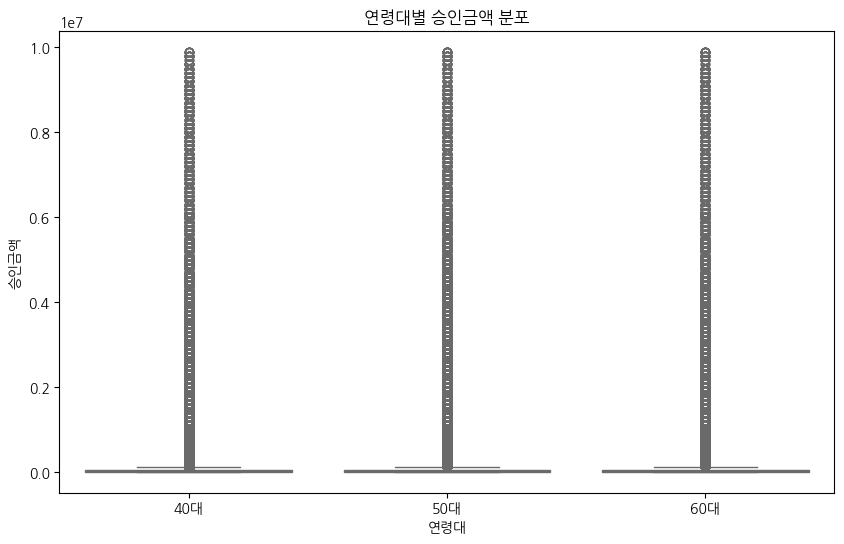

In [7]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


# 각 데이터에 연령대 정보 추가
cc_21_40['연령대'] = '40대'
cc_21_50['연령대'] = '50대'
cc_21_60['연령대'] = '60대'

# 세 데이터를 하나로 합치기
cc_21_all = pd.concat([cc_21_40, cc_21_50, cc_21_60])

# 일원 분산분석 (ANOVA) 수행
anova_results = ols('승인금액 ~ C(연령대)', data=cc_21_all).fit()
anova_table = sm.stats.anova_lm(anova_results, typ=2)

print("일원 분산분석 (ANOVA) 결과")
print(anova_table)

# 승인금액 분포 시각화 (연령대별 박스플롯)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
sns.boxplot(x='연령대', y='승인금액', data=cc_21_all, palette="Set3")
plt.title('연령대별 승인금액 분포')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

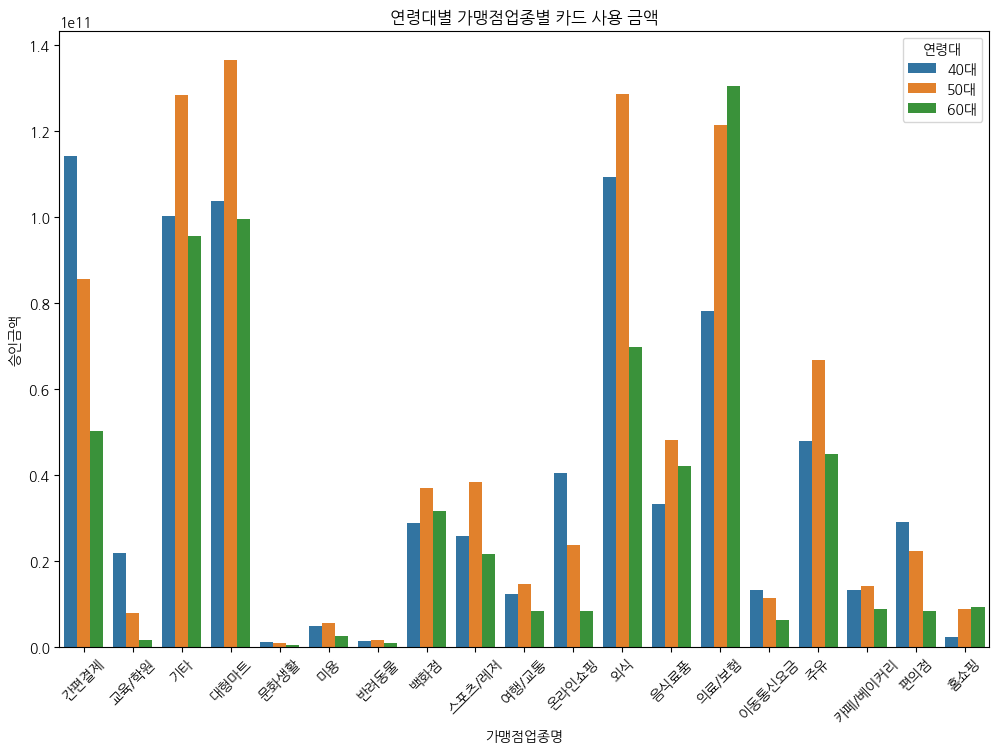

F-statistic: 0.4923641132023129, p-value: 0.613896672695845
연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.


In [9]:
combined_data = pd.concat([cc_21_40[['가맹점업종명', '승인금액', '연령대']],
                            cc_21_50[['가맹점업종명', '승인금액', '연령대']],
                            cc_21_60[['가맹점업종명', '승인금액', '연령대']]])

# 가맹점업종별 승인금액 합계
age_group_summary = combined_data.groupby(['연령대', '가맹점업종명'])['승인금액'].sum().reset_index()

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=age_group_summary, x='가맹점업종명', y='승인금액', hue='연령대')
plt.title('연령대별 가맹점업종별 카드 사용 금액')
plt.xticks(rotation=45)
plt.legend(title='연령대')
plt.show()

# 총 승인금액 차이 분석을 위한 피벗 테이블 생성
pivot_table = age_group_summary.pivot(index='가맹점업종명', columns='연령대', values='승인금액').fillna(0)

# ANOVA 분석
f_statistic, p_value = stats.f_oneway(pivot_table['40대'], pivot_table['50대'], pivot_table['60대'])

# 결과 출력
print(f'F-statistic: {f_statistic}, p-value: {p_value}')

# 결과 해석
if p_value < 0.05:
    print("연령대 간의 승인금액 차이가 통계적으로 유의미합니다.")
else:
    print("연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.")

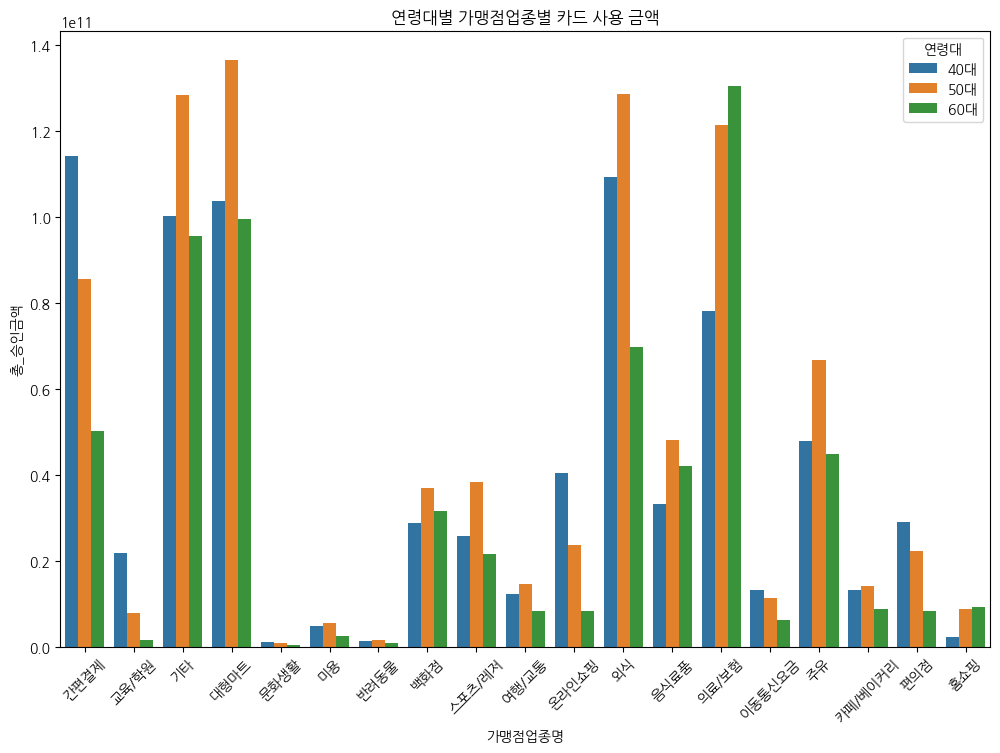

간편결제의 F-statistic: nan, p-value: nan
간편결제: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
교육/학원의 F-statistic: nan, p-value: nan
교육/학원: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
기타의 F-statistic: nan, p-value: nan
기타: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
대형마트의 F-statistic: nan, p-value: nan
대형마트: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
문화생활의 F-statistic: nan, p-value: nan
문화생활: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
미용의 F-statistic: nan, p-value: nan
미용: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
반려동물의 F-statistic: nan, p-value: nan
반려동물: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
백화점의 F-statistic: nan, p-value: nan
백화점: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
스포츠/레저의 F-statistic: nan, p-value: nan
스포츠/레저: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
여행/교통의 F-statistic: nan, p-value: nan
여행/교통: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
온라인쇼핑의 F-statistic: nan, p-value: nan
온라인쇼핑: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
외식의 F-statistic: nan, p-value: nan
외식: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
음식료품의 F-statistic: nan, p-value: nan
음식료품: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.
의료/

C:\Users\campus3S030\Desktop\alphaco\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:567: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
C:\Users\campus3S030\AppData\Local\Temp\ipykernel_21164\2037016600.py:20: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_statistic, p_value = stats.f_oneway(


In [10]:
# 가맹점업종별 승인금액 및 카드 사용 건수 집계
age_group_summary = combined_data.groupby(['연령대', '가맹점업종명']).agg(
    총_승인금액=('승인금액', 'sum'),
    카드_사용_건수=('승인금액', 'count')
).reset_index()

# 각 가맹점업종별 승인금액 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=age_group_summary, x='가맹점업종명', y='총_승인금액', hue='연령대')
plt.title('연령대별 가맹점업종별 카드 사용 금액')
plt.xticks(rotation=45)
plt.legend(title='연령대')
plt.show()

# ANOVA 분석
# 각 가맹점업종에 대해 연령대 간의 총 승인금액 차이를 분석
for 업종 in age_group_summary['가맹점업종명'].unique():
    subset = age_group_summary[age_group_summary['가맹점업종명'] == 업종]
    if subset.shape[0] == 3:  # 연령대가 모두 있을 경우에만 ANOVA 수행
        f_statistic, p_value = stats.f_oneway(
            subset[subset['연령대'] == '40대']['총_승인금액'],
            subset[subset['연령대'] == '50대']['총_승인금액'],
            subset[subset['연령대'] == '60대']['총_승인금액']
        )
        print(f'{업종}의 F-statistic: {f_statistic}, p-value: {p_value}')

        # 결과 해석
        if p_value < 0.05:
            print(f"{업종}: 연령대 간의 승인금액 차이가 통계적으로 유의미합니다.")
        else:
            print(f"{업종}: 연령대 간의 승인금액 차이가 통계적으로 유의미하지 않습니다.")